In [1]:
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import cv2 as cv
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

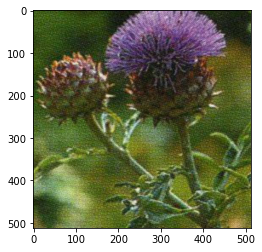

In [2]:
testImage=img.imread('../flowers/artichoke/344.jpeg')
plt.imshow(testImage)

In [3]:
data=[]
label=[]

FlowerPath='../flowers'        
os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath):
    for file in os.listdir(os.path.join(FlowerPath,folder)):
        if file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (128,128))
            data.append(im)
            
        else: 
             continue

data_arr = np.array(data)
label_arr = np.array(label)
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,106)
X = data_arr/255



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

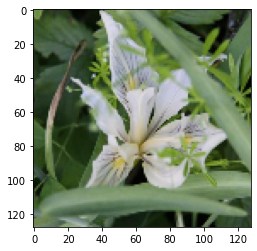

In [5]:
img=plt.imshow(X_train[0])